# Sales Analysis

#### Import Necessary Libraries

In [281]:
import pandas as pd
import os

#### Task 1. Let's merge the 12 months of sales data into a single csv file

In [282]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir('./Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv("all_data.csv", index=False)

#### Read in updated dataframe

In [283]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean up the data
##### we got a ValueError: cannot convert float NaN to integer (from first three lines of code in Task 2), so we need to clean data 

#### Drop rows of NAN

In [284]:
nan_df = all_data[all_data.isna().any(axis=1)] # googled how to find rows with NAN pandas (stackoverflow). all_data is our df
nan_df.head()


all_data = all_data.dropna(how="all")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [285]:
all_data = all_data.reset_index(drop=True) # reseting the index 

##### ValueError: invalid literal for int() with base 10: 'Or' (from first three lines of code in Task 2), so lets find "Or" and delete it.
#### Find "Or" and delete it

In [286]:
# temp_df = all_data[all_data["Order Date"].str[0:2] == "Or"] # (Found the "Or"). We've set a temporary df to proceed the filter. We're trying to index all_data on a certain condition and the condition we want is the first two characters of the above order date equals "Or" as this is causing our issue
# temp_df.head()

all_data = all_data[all_data["Order Date"].str[0:2] != "Or"] # (Deleted the "Or"). Getting ride of the duplicated column headers  

##### TypeError: can't multiply sequence by non-int of type 'str' (in task 3), so the column 
#### convert columns to the correct type

In [287]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"]) # Make int
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"]) # Make float

### Augment data with additional columns 

### Task2: Add Month Column

In [288]:
all_data["Month"] = all_data["Order Date"].str[0:2]
all_data["Month"] = all_data["Month"].astype("int32")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Task 3: Add a sales column

In [289]:
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Task 4: Add a city column

In [290]:
# Lets use the .apply(), this allows us to run any function in our data frame
# we can define a function that takes in some sort of address value
def get_city(address):
    return address.split(",")[1]

def get_state(address):
    return address.split(",")[2].split(" ")[1]

#all_data["Column"] = all_data["Purchase Address"].apply(lambda x: x.split(",")[1]) # this is saying for every x value, so when we do .apply() we can use lamda x and basically the x value in the row is the cell content. This is saying for each content we want to split it bny commas and grab the first index   
all_data["City"] = all_data["Purchase Address"].apply(lambda x: get_city(x) + " (" + get_state(x) + ")") # whenever we do lamda x this allows us to grab the cell contents. Can also use f strings: f"{get_city(x)} ({get_state(x)})")" 
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


#### Q1 - What was the best month for sales? How much was earned that month?
##### key words: month and sales

In [291]:
result = all_data.groupby("Month").sum()
result.head()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06


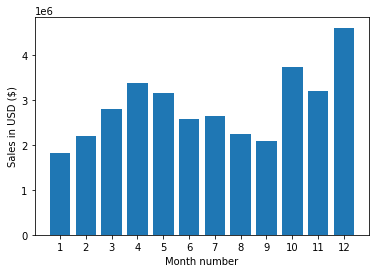

In [292]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months, result["Sales"])
plt.xticks(months)
plt.ylabel("Sales in USD ($)")
plt.xlabel("Month number")
plt.show()

#### Q2 - What US city had the highest number of sales ?

In [293]:
result = all_data.groupby("City").sum()
result

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


In [294]:
import matplotlib.pyplot as plt

# cities = all_data["City"].unique() # .unique() gives the unique values for a specific column 
# using the above code has given us inconsistencies, this is because when we're showing the y data the order matters, but when we do all_data["City"].unique() it orders it in a different way, so our x data and our y data are not in the same order. We need the Citys data to be in the same order as the Sales results. We do this by doing list comprehention.
# we need to two different parameters here:
cities = [city for city, df in all_data.groupby("City")]

plt.bar(cities, result["Sales"])
plt.xticks(cities, rotation = "vertical", size=8)
plt.ylabel("Sales in USD ($)")
plt.xlabel("City name")
plt.show()

IndentationError: unexpected indent (<ipython-input-294-2a3b04510ef2>, line 6)